# **Builtin Python datetime**

In [0]:
from datetime import datetime

In [0]:
my_year = 2020
my_month = 9
my_day = 24
my_hour = 13
my_min = 30
my_sec = 29

In [0]:
my_date = datetime(my_year, my_month, my_day)

In [29]:
my_date

datetime.datetime(2020, 9, 24, 0, 0)

In [0]:
my_date = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [31]:
my_date

datetime.datetime(2020, 9, 24, 13, 30, 29)

# **datetime64 in Numpy**

In [0]:
import numpy as np

In [33]:
np.array(['2020-03-15', '2020-03-17'], dtype='datetime64')

array(['2020-03-15', '2020-03-17'], dtype='datetime64[D]')

In [35]:
np.arange('2020-06-23', '2020-07-02', 1, dtype='datetime64[D]')

array(['2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
       '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30',
       '2020-07-01'], dtype='datetime64[D]')

# **Pandas**

In [0]:
import pandas as pd

**Date Time**

In [37]:
pd.date_range('2020-01-01', periods=7, freq='D')    # D stand for days

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [42]:
# we can format our date time style   e.g - dd/mm/yy
pd.to_datetime(['2/1/2020', '10/1/2020'], format='%d/%m/%Y')

DatetimeIndex(['2020-01-02', '2020-01-10'], dtype='datetime64[ns]', freq=None)

In [0]:
# creating random dataframe
data = np.random.randn(3,2)
cols = 'A B'.split()
idx = pd.date_range('2020-01-01', periods=3, freq='D')
df = pd.DataFrame(data, index=idx, columns=cols)

In [46]:
df

,A,B
2020-01-01,-0.692387,-0.336816
2020-01-02,0.657993,1.653930
2020-01-03,-1.682997,0.851484


In [48]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [49]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [50]:
df.index.argmax()

2

**Time Resampling**

In [76]:
df = pd.read_csv('/content/drive/My Drive/Time Series practise/Data/starbucks.csv', index_col='Date', parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [77]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

**Resampling**

In [57]:
# using resample with rule
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


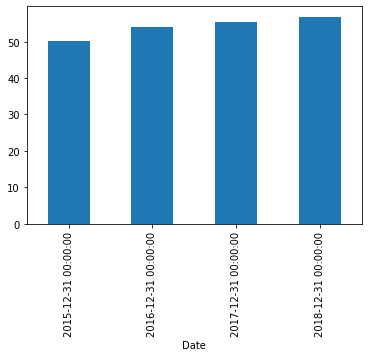

In [61]:
# plotting for avg closing price/year
df['Close'].resample(rule='A').mean().plot.bar()

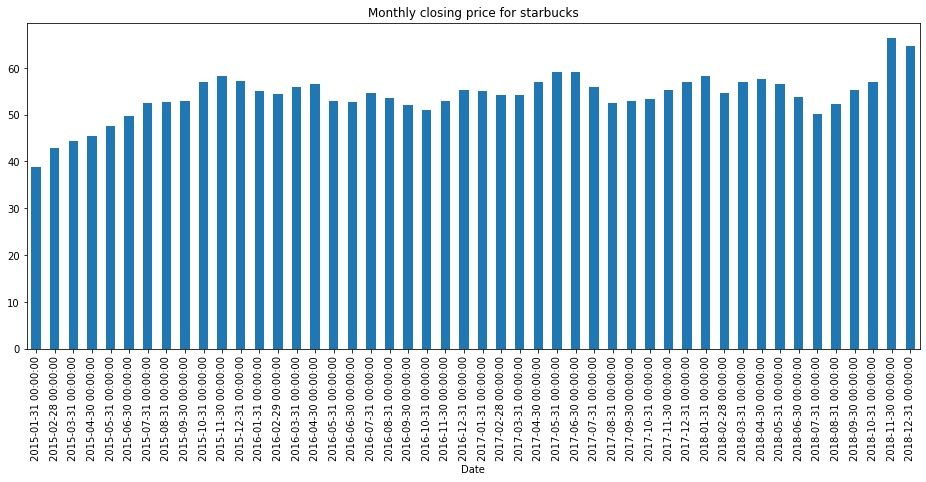

In [63]:
# plotting for avg closing price/month
title = 'Monthly closing price for starbucks'
df['Close'].resample(rule='M').mean().plot.bar(figsize=(16,6), title=title)

**Time shifting**

In [64]:
df.shift(2).head()          # shifting the rows down

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,38.0061,6906098.0
2015-01-07,37.2781,11623796.0
2015-01-08,36.9748,7664340.0


In [66]:
df.shift(-1).head()        # shifting the rows up

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [67]:
df.shift(periods=1,freq='M').head()     # shifting by the end of thet month

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


**Rolling and Expanding**

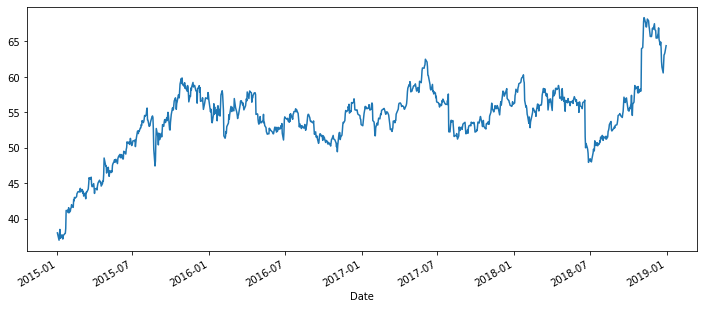

In [69]:
df['Close'].plot.line(figsize=(12,5))       # normal line graph plot

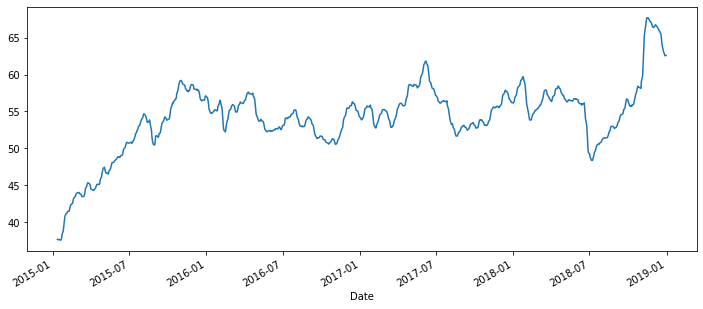

In [72]:
# rolling for window of 7 days and doing mean at that time period
df.rolling(window=7).mean()['Close'].plot.line(figsize=(12,5))

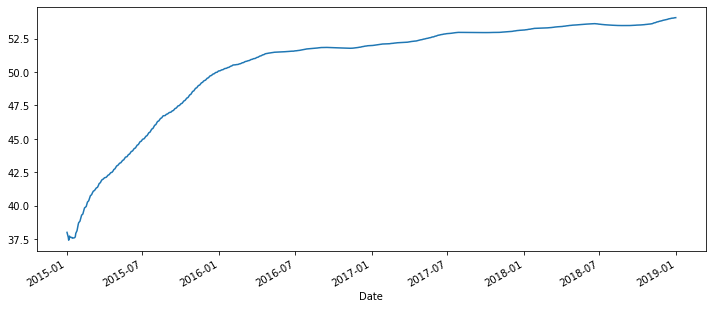

In [73]:
# here the window keeps on expanding
df['Close'].expanding().mean().plot.line(figsize=(12,5))

# **Visualizing TS with Pandas**

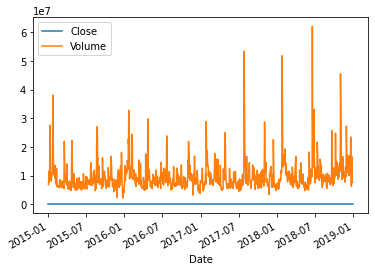

In [79]:
df.plot()       # huge diff between scales

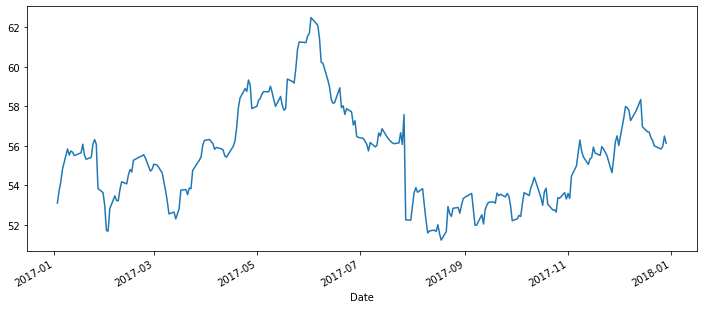

In [80]:
df['Close']['2017-01-01':'2017-12-31'].plot.line(figsize=(12,5))

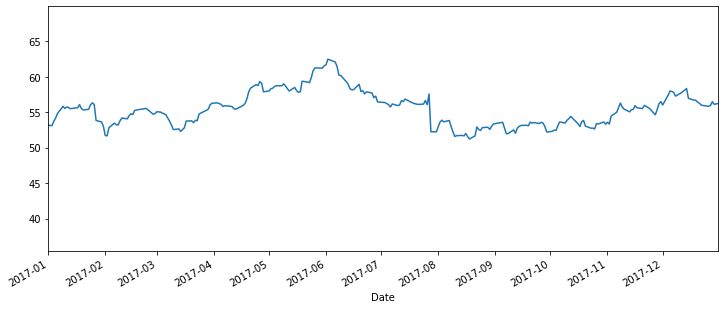

In [83]:
#another way
df['Close'].plot.line(figsize=(12,5), xlim=['2017-01-01','2017-12-31'])
# we can also set ylim just like xlim
# we can set line style ls
# we can set color c

In [0]:
from matplotlib import dates

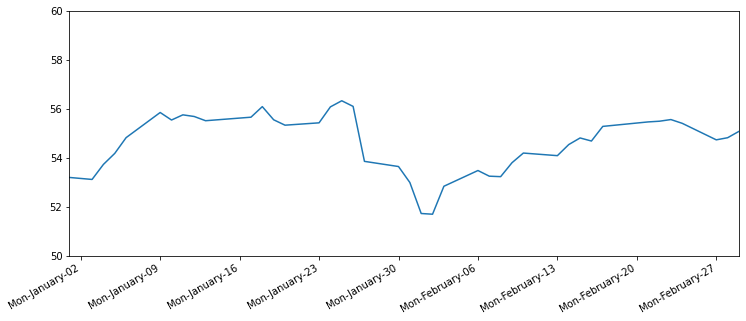

In [87]:
#setting the xticks
ax = df['Close'].plot.line(figsize=(12,5), xlim=['2017-01-01','2017-03-01'], ylim = [50,60])
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

# we can also set minor locator and formatter